In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

Unstable training, appending 0
Unstable training, appending 0
{4: [0.9724999999999999, 0.9624999999999999, 1.0, 0.9975, 0.195, 0, 0.9975, 0.1775, 0, 0.9975, 0.965, 1.0, 0.9924999999999999, 1.0, 0.0225, 0.9875, 0.1875, 0.9425, 0.195, 0.1925], 10: [0.9975, 1.0, 1.0, 1.0, 1.0, 0.9824999999999999, 1.0, 1.0, 1.0, 0.9975, 1.0, 0.0025, 1.0, 0.0, 0.01, 1.0, 0.9975, 1.0, 0.0075, 1.0], 30: [0.0925, 1.0, 1.0, 0.0075, 1.0, 1.0, 0.02, 0.015, 0.0125, 0.0, 0.057499999999999996, 1.0, 1.0, 1.0, 0.0025, 0.0075, 1.0, 1.0, 1.0, 1.0], 50: [0.0, 0.0325, 0.005, 0.01, 0.01, 0.0025, 1.0, 0.0, 0.0175, 0.0025, 0.005, 0.005, 0.057499999999999996, 0.0, 0.0075, 0.0, 0.0, 0.01, 0.0, 0.01]}


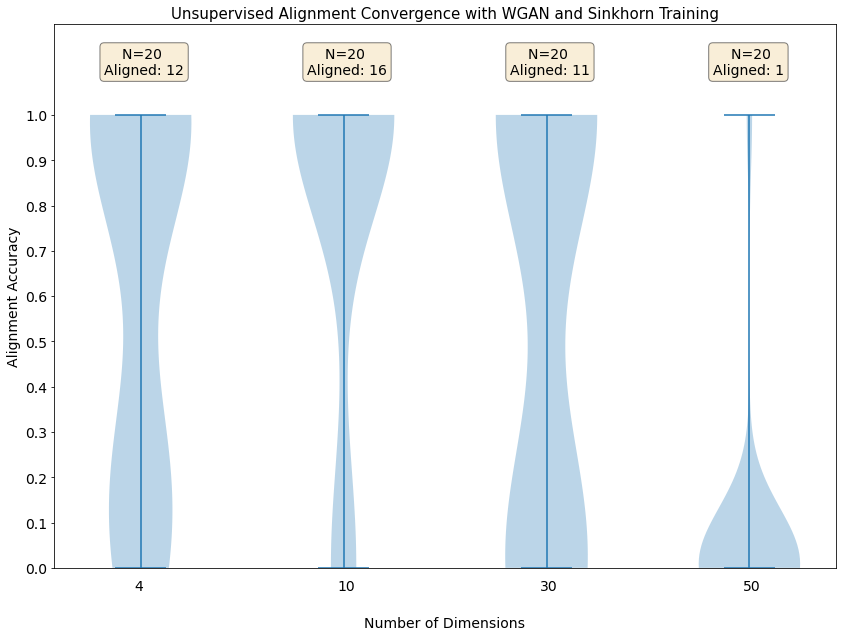

In [16]:
exp_dir = '../unsupervised/exp/synthetic/'

N = 20
n_dims = [4,10,30,50]
data = {n_dim: [0] * N for n_dim in n_dims}

for n_dim in n_dims:
    for i in range(1,1+N):
        try:
            with open(os.path.join(exp_dir, f'z_0_n_dim_{n_dim}_{i}-z_1_n_dim_{n_dim}_{i}/eval_acc.log'),'r') as r:
                for line in r.readlines():
                    data[n_dim][i-1] += 0.5 * (float(line.split('Accuracy:')[1][:-2])/100)
        except:
            print('Unstable training, appending 0')

print(data)

plt.figure(figsize=(14,10))
plt.title("Unsupervised Alignment Convergence with WGAN and Sinkhorn Training", fontsize=15)
plt.violinplot(data.values(), positions=range(len(data.keys())))
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
plt.ylim(0,1.2,0.1)
plt.ylabel('Alignment Accuracy',fontsize=14)

# statistical info box
for i, n_dim in enumerate(n_dims):
    mu = np.mean(data[n_dim])
    converged = sum([1 for acc in data[n_dim] if acc >= 0.9])
    assert N-converged == sum([1 for acc in data[n_dim] if acc < 0.9])

    textstr = '\n'.join((
        r'$N=%.1d$' % (N, ),
        r'> 0.9: %.1d' % (converged, ),
        r'< 0.9: %.1d' % (N-converged, )))
    
    textstr = '\n'.join((
        r'    N=%.1d' % (N, ),
        r'Aligned: %.1d' % (converged, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    plt.text(i-0.18, 1.15, textstr, fontsize=14, verticalalignment='top', bbox=props)
    plt.text(i-0.03, -.05, n_dim, fontsize=14)

plt.text(1.1,-0.13,'Number of Dimensions',fontsize=14)
plt.savefig(f'./assets/unsupervised_wgan_sinkhorn_convergence.pdf')